In [1]:
import numpy as np

In [25]:
from cvxopt import matrix, solvers

In [581]:
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [384]:
%matplotlib inline
import matplotlib.pyplot as plt

In [774]:
X=np.array([[.75,.10],
            [.85,.80],
            [.85,.95],
            [.15,.10],
            [.05,.25],
            [.05,.50],
            [.85,.25]])
Y=np.array([-1,-1,1,-1,1,1,-1])

In [765]:
class SVC():
    def __init__(self, kernel=None, C=0):
        self.C = C
        if kernel == None:
            self.kernel = lambda x,z : np.dot(x,z)
        else:
            self.kernel = kernel
    
    def train(self, X, Y):
        self.X = X
        self.Y = Y.reshape(-1,1)
        
        
        n = len(Y)
        P = matrix([[(self.kernel(X[i],X[j]) * Y[i]*Y[j]) for i in range(n)] for j in range(n)])
        q = matrix([-1. for i in range(n)])
        G = matrix(-np.eye(n))
        h = matrix(np.zeros((n,1)))
        A = matrix(Y).trans()
        b = matrix(0.)
        sol = solvers.qp(P, q, G, h, A, b)
        
        self.alpha = np.array(sol['x'])
        self.w = (np.array(sol['x']) * Y.reshape(-1, 1)).T @ X
        self.b = - ( np.min(X[Y==1] @ w.T) + np.max(X[Y==-1] @ w.T) )/2
        
    def predict(self, X):
        scores = [0 for i in range(len(X))]
        for j in range(len(X)):
            score = 0
            for i in range(len(self.X)):
                score += self.alpha[i] * self.Y[i] * self.kernel(X[j], self.X[i])
            scores[j] = score + self.b
        
        #scores = X @ self.w.T + self.b
        Y_hat = [1 if score>0 else -1 for score in scores]
        return Y_hat

array([[ -2.76496634e-04,   1.10325927e-05,  -3.64054680e-05,
         -1.71240175e-03,   1.50153216e-03,   3.85530526e-04,
          4.21400182e-06,  -1.32834772e-03,  -3.96157848e-05]])

In [ ]:
n = len(y_train)
P = matrix([[(kernel(X_train[i],X_train[j]) * y_train[i]*y_train[j]) for i in range(n)] for j in range(n)])
q = matrix([-1. for i in range(n)])
G = matrix(-np.eye(n))
h = matrix(np.zeros((n,1)))
A = matrix(y_train).trans()
b = matrix(0.)
sol = solvers.qp(P, q, G, h, A, b)

alpha = np.array(sol['x'])
w = (np.array(sol['x']) * Y.reshape(-1, 1)).T @ X
b = - ( np.min(X[Y==1] @ w.T) + np.max(X[Y==-1] @ w.T) )/2

In [ ]:
scores = []
for j in range(len(X_test)):
    score = 0
    for i in range(len(X_train)):
        score += self.alpha[i] * y_train[i] * kernel(X_test[j], X_train[i])
    scores[j] = score

Y_hat = [1 if score>0 else -1 for score in scores]
Y_hat

In [188]:
def load_CSV(file_name):
    tmp = np.loadtxt(file_name, dtype=np.str, delimiter=",")
    features = tmp[1:,:-1].astype(np.float)# load features
    labels = tmp[1:,-1].astype(np.float)# load labels
    return features, labels # return ndarray

In [766]:
clf = SVC()

In [736]:
y_train[y_train==0]=-1
y_test[y_test==0]=-1

In [767]:
clf.train(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -6.0817e+02 -1.9838e+03  1e+04  1e+02  3e+00
 1: -2.8000e+03 -7.0458e+03  1e+04  8e+01  3e+00
 2: -7.9479e+03 -1.5031e+04  9e+03  6e+01  2e+00
 3: -1.6815e+04 -2.5243e+04  9e+03  5e+01  2e+00
 4: -4.9051e+04 -5.7879e+04  9e+03  4e+01  1e+00
 5: -1.3885e+05 -1.5688e+05  2e+04  3e+01  1e+00
 6: -7.6072e+05 -8.0841e+05  5e+04  3e+01  1e+00
 7: -1.4000e+06 -1.4834e+06  8e+04  3e+01  1e+00
 8: -1.4345e+06 -1.5198e+06  9e+04  3e+01  1e+00
 9: -2.1143e+07 -2.1428e+07  3e+05  3e+01  1e+00
10: -1.4260e+09 -1.4282e+09  2e+06  3e+01  1e+00
11: -2.2839e+11 -2.2866e+11  3e+08  3e+01  1e+00
12: -2.3179e+11 -2.3206e+11  3e+08  3e+01  1e+00
13: -2.9678e+11 -2.9713e+11  3e+08  3e+01  1e+00
14: -3.0464e+11 -3.0499e+11  4e+08  3e+01  1e+00
15: -3.0493e+11 -3.0529e+11  4e+08  3e+01  1e+00
16: -5.4106e+11 -5.4170e+11  6e+08  3e+01  1e+00
17: -6.0686e+11 -6.0757e+11  7e+08  3e+01  1e+00
18: -7.8617e+11 -7.8709e+11  9e+08  3e+01  1e+00
19: -1.0008e+12 -1.00

In [768]:
Y_hat=clf.predict(X_test)
Y_hat

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [769]:
compare = (Y_hat - y_test)
compare[compare==0].shape

(26,)

## (b) Train an SVM classifier with the kernel function k(x, z) = x⊤z on 9/10ths of the credit card data set.

In [735]:
X,Y = load_CSV('creditCard.csv')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2018)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

ROC and AUC:

0.84542815674891147

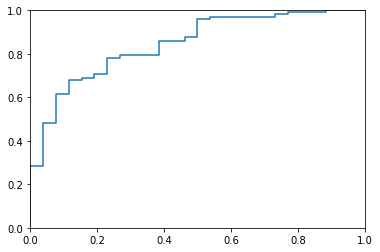

In [683]:
linear_svc = svm.SVC(kernel='linear')
y_score = linear_svc.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
metrics.auc(fpr,tpr)

accuracy:

In [684]:
linear_svc.score(X_test, y_test)

0.84090909090909094

## (c) Train an SVM classifier with the radial basis kernel

$\sigma^2=5$:

0.76015965166908561

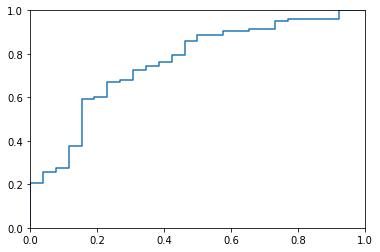

In [685]:
rbf_svc5 = svm.SVC(gamma=1/5)
y_score = rbf_svc5.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
metrics.auc(fpr,tpr)

accuracy:

In [691]:
rbf_svc5.score(X_test, y_test)

0.80303030303030298

$\sigma^2=25$:

0.84651669085631354

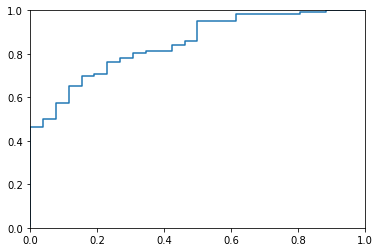

In [686]:
rbf_svc25 = svm.SVC(gamma=1/25)
y_score = rbf_svc25.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
metrics.auc(fpr,tpr)

accuracy:

In [690]:
rbf_svc25.score(X_test, y_test)

0.84090909090909094

In [695]:
def scale(data):
    return (data - data.mean()) / data.std()

In [692]:
X,Y = load_CSV('creditCard.csv')

X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

In [669]:
X,Y = load_CSV('creditCard.csv')
np.random.seed(2018)
itrain = np.random.choice(len(X), int(X.shape[0]*0.9),replace=False)
itest = np.array(list(set(range(len(X))) - set(itrain)))
X_train = X[itrain]
y_train = Y[itrain]
X_test = X[itest]
y_test = Y[itest]
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [597]:
def ROC(X,Y, classifier):
    scores = classifier.decision_function(X)
    #ROC
    curve = sorted(zip(scores,Y), key=lambda x:x[0], reverse=True)
    x = [0 for i in range(len(curve))]
    y = [0 for i in range(len(curve))]
    for i in range(1,len(curve)):
        if curve[i][1]==1:
            x[i] = x[i-1]
            y[i] = y[i-1]+1/len(Y[Y==1])
        else:
            x[i] = x[i-1]+1/len(Y[Y==0])
            y[i] = y[i-1]  
    plt.plot(x,y)
    plt.xlim(0,1)
    plt.ylim(0,1)   
    return x,y

In [638]:
def AUC(x,y):
    area = 0
    for i in range(1,len(x)):
        area += (x[i] - x[i-1]) * y[i]
    return area

0.7507256894049341

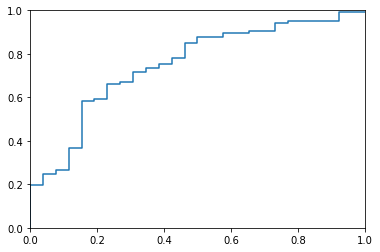

In [688]:
rbf_svc5 = svm.SVC(gamma=1/5)
rbf_svc5.fit(X_train, y_train)
x, y = ROC(X_test, y_test, rbf_svc5)
AUC(x,y)

0.8370827285921619

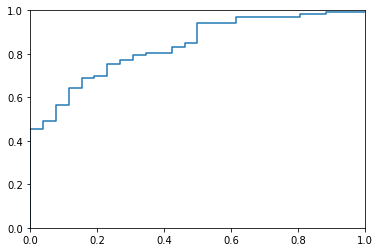

In [689]:
rbf_svc25 = svm.SVC(gamma=1/25)
rbf_svc25.fit(X_train, y_train)
x, y = ROC(X_test, y_test, rbf_svc25)
AUC(x,y)